# STAT 650 - Final Project Outline

### Heart Disease Prediction using Framingham Heart Study Data: A Comparative Analysis of Classification and Regression Models:

### by Abeba Bade

In [1]:
# Data Manipulation and Analysis Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Machine Learning Libraries
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             roc_auc_score, r2_score, mean_squared_error, mean_absolute_error,
                             classification_report, roc_curve)
from sklearn.model_selection import (train_test_split, cross_val_score, GridSearchCV)
from sklearn.linear_model import (LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet)
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE


In [2]:
data= pd.read_csv('framingham.csv')
data.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# 2. Introduction 
#### Research Interest/Problem Statement:

Coronary Heart Disease (CHD) remains a leading cause of mortality worldwide, prompting the necessity for predictive models that identify and evaluate risk factors contributing to its development. This project aims to investigate the association between various demographic and health-related factors with the ten-year risk of developing CHD by utilizing multiple Classification models , Logistic Regression, Random Forest, and Gradient Boosting, and Regression models such as multiple linear regression, Lasso, ridge and ElasticNet.

#### Goal and Objectives (Research Hypotheses):

The primary goal of this project is to develop a predictive model to estimate an individual's risk of developing CHD within the next decade. The objectives include:

Assessing the correlation between lifestyle factors (such as smoking, BMI, and glucose levels) and the incidence of CHD.

Evaluating the impact of medical history elements (like prevalent hypertension, diabetes, and cholesterol levels) on CHD risk.

Building a robust predictive model to forecast the likelihood of CHD within ten years based on demographic and health-related parameters.

#### Significance of the Project:

Understanding the complex interplay between various risk factors and the development of CHD is critical for early identification, intervention, and prevention strategies. This project's findings could significantly contribute to personalized healthcare by enabling clinicians to identify high-risk individuals and implement targeted interventions to mitigate CHD risk factors.This potentially enhance our understanding of cardiovascular health but also by offering actionable insights for healthcare professionals, policymakers, and individuals to prevent and manage coronary heart disease effectively.

#### Theoretical Background:

This project builds upon established epidemiological evidence linking lifestyle factors, medical history, and physiological markers to the development of CHD. Previous studies have indicated that variables like smoking habits, blood pressure, cholesterol levels, and diabetes status significantly influence an individual's susceptibility to coronary heart disease. By leveraging these insights, this project aims to refine and expand upon existing predictive models, incorporating a diverse set of demographic data to enhance accuracy and inclusivity.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


# 3. Data Description (15 pts)

In [4]:
data.shape

(4240, 16)

In [5]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


# Definition and Type of Variables

In [7]:
# Numeric Variables
numeric_columns = data.select_dtypes(include=['number']).columns 
numeric_columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
#Categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
categorical_columns

[]

# Data Preprocessing:

Missing values

In [9]:
# Checking for missing values
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [10]:
# Dropping rows with missing values
data.dropna(axis=0,inplace=True)
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

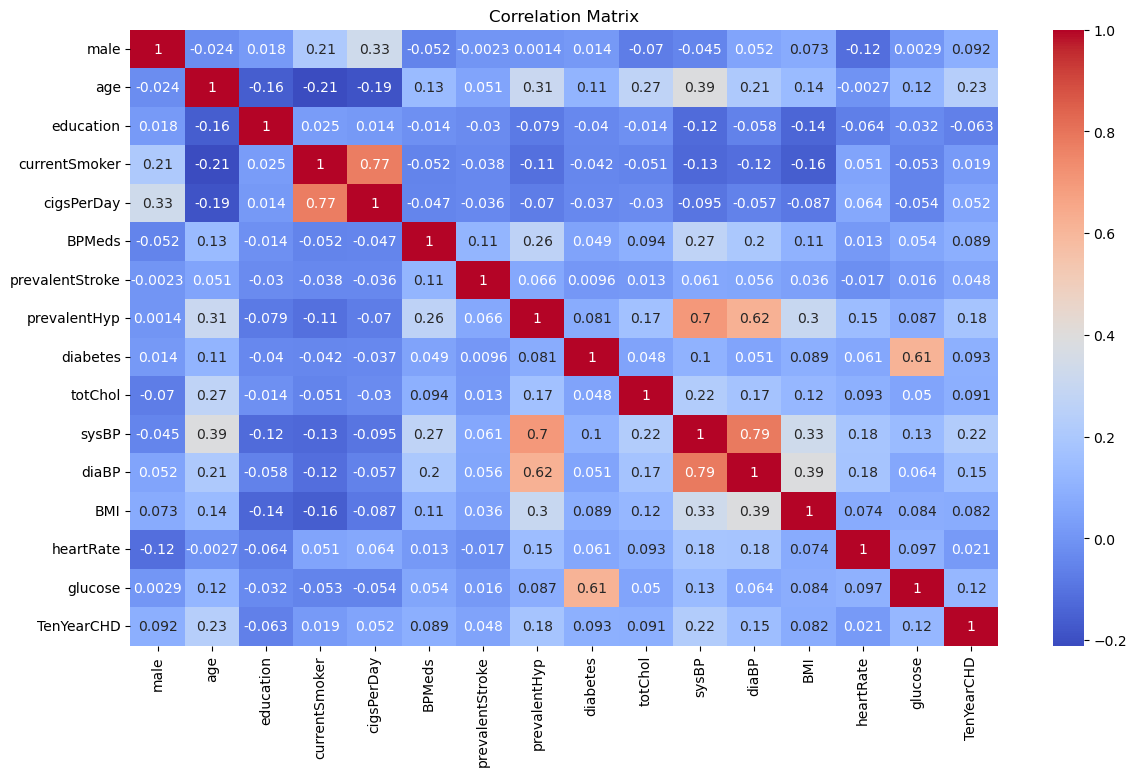

In [11]:
# Correlation matrix for some of the numeric variables
correlation_matrix = data.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('Correlation_Matrix.png')
plt.show()

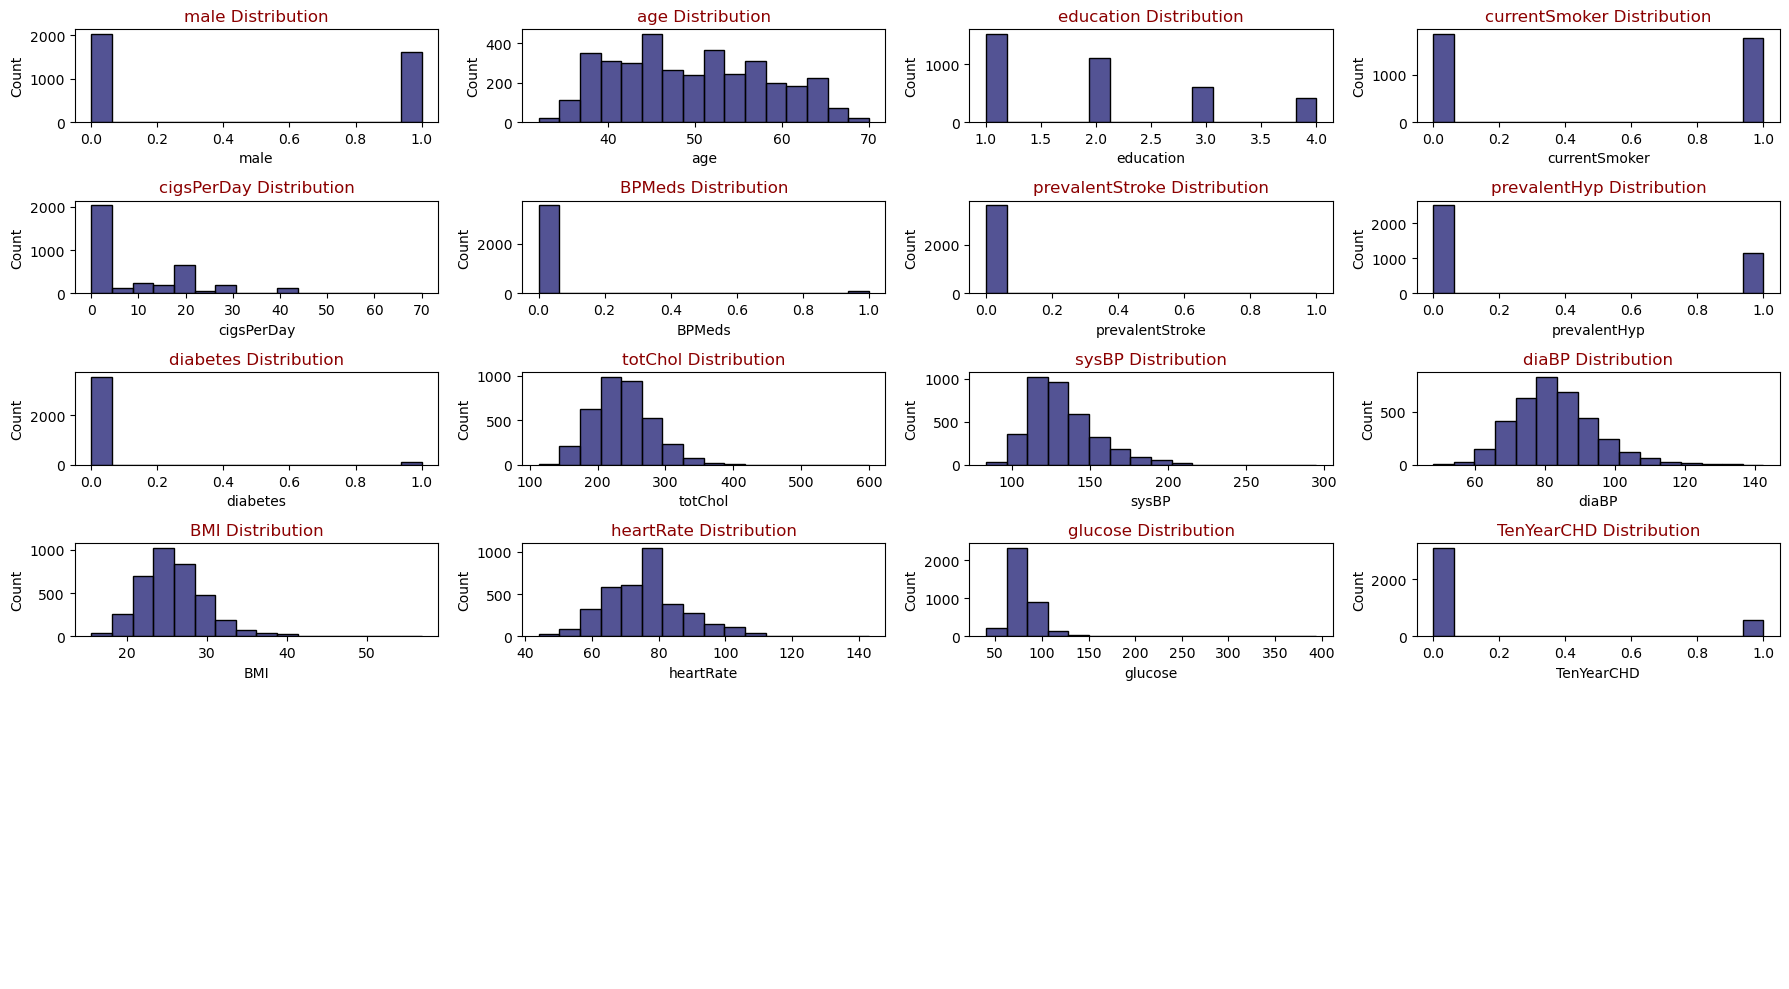

In [12]:
# create histograms for each feature in the Data

def draw_histograms(dataframe, features, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(18,10))
    axes = axes.flatten()
    # Loop through each feature to create histograms 
    for i, feature in enumerate(features):
        # Plot the histogram for the feature
        sns.histplot(dataframe[feature], bins=16, kde=False, ax=axes[i], color='midnightblue')
        
        # Set title for each subplot indicating feature distribution
        axes[i].set_title(feature + " Distribution", color='DarkRed')
    for j in range(len(features), rows * cols):
        axes[j].axis('off')
    plt.tight_layout()
    plt.savefig('Distribution_plots.png')
    plt.show()
#plt.savefig('Distribution_plots.png')
draw_histograms(data, data.columns, 6, 4)


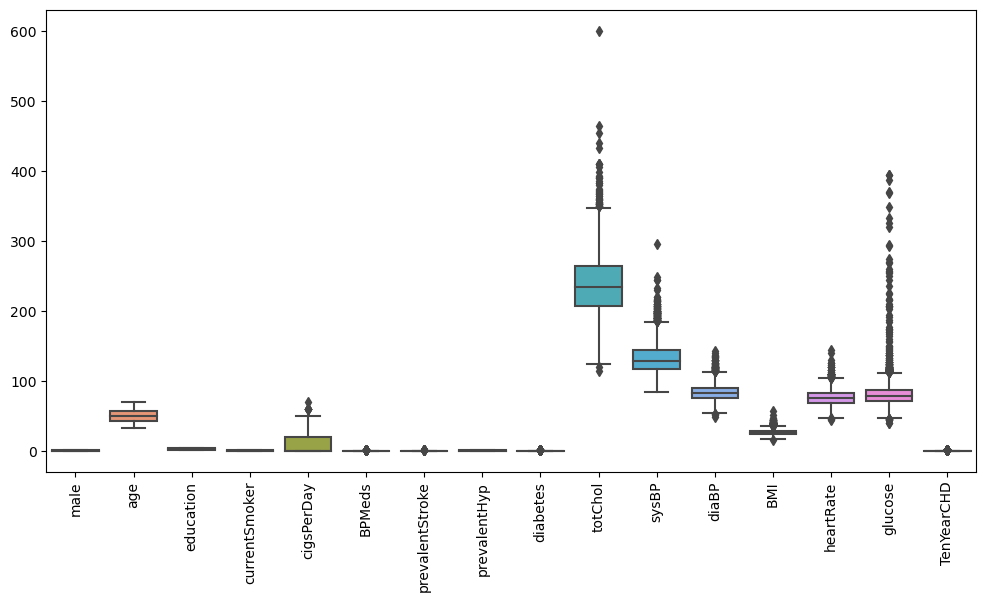

In [13]:
# Visualizing outliers using boxplots for all numerical columns
plt.figure(figsize=(12,6))
sns.boxplot(data=data[numeric_columns])
plt.xticks(rotation=90) 
plt.savefig('boxplots_for_outliers.png')
plt.show()

# Dropping all rows that have outliers in at least one column

In [14]:
# Calculate z-scores for numeric columns
z_scores = stats.zscore(data)
# Find rows where any of the z-scores are greater than a threshold
outlier_indices = (z_scores > 3).any(axis=1)
# Remove rows associated with outliers
clean_data = data[~outlier_indices]
clean_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# 4. Methodology (25 pts)


# Selecting features using RFE:

RFE works by training the model (in this case, a RandomForestClassifier) on the full set of features and assigning weights or rankings to each feature. Then, it recursively eliminates the least important features (based on their weights or rankings) until the specified number of features to select is reached.

In [15]:
X = data.drop(columns=["TenYearCHD"])
y = data["TenYearCHD"]

In [16]:
# Specify features and target variables
#X=clean_data[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
#y=clean_data["TenYearCHD"]
#X = 
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape


((2926, 15), (2926,), (732, 15), (732,))

In [17]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Define your RandomForestClassifier
rf = RandomForestClassifier()

# Initialize RFE with RandomForestClassifier as estimator and select 8 features
rfe = RFE(estimator=rf, n_features_to_select=8)

# Fit RFE to your training data
rfe_model = rfe.fit(X_train, y_train)

# Display the details about RFE and selected features
print("RFE Estimator:", rfe)
print("\nRFE Estimator Type:", type(rfe.estimator_))
print("\nRFE Estimator Features Ranking:", rfe_model.ranking_)
print("\nRFE Estimator Selected Features:", rfe_model.support_)

# Extract selected features' names
selected_features = pd.DataFrame({
    'Features': X_train.columns,
    'Selected': rfe_model.support_,
    'Ranking': rfe_model.ranking_
})

# Filter out features that are selected
features = selected_features[selected_features['Selected']]['Features'].values.tolist()
print("\nSelected Features:", features)

RFE Estimator: RFE(estimator=RandomForestClassifier(), n_features_to_select=8)

RFE Estimator Type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>

RFE Estimator Features Ranking: [3 1 2 5 1 6 8 4 7 1 1 1 1 1 1]

RFE Estimator Selected Features: [False  True False False  True False False False False  True  True  True
  True  True  True]

Selected Features: ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [18]:
# Standardization
#scaler = StandardScaler()
#X_train_scaled=scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Model Evaluation and Selection (10 pts)

Seven regression models were evaluated:The selected regression models for predicting coronary heart disease (CHD) risk are:

1. Logistic Regression:
2. Random Forest Classifier
3. Gradient Boosting Classifier
4. Multiple Linear Regression
5. Lasso
6. Ridge
7. ElasticNet

# Classification Models:

In [19]:
# Splitting data into training and testing sets (if not already split)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_clf, y_train_clf)
y_pred_logistic = logistic_model.predict(X_test_clf)
logistic_accuracy = accuracy_score(y_test_clf, y_pred_logistic)
print("ROC AUC:", roc_auc_score(y_test, y_pred_logistic))
print("Logistic Regression Metrics:")
print(f"Accuracy: {logistic_accuracy}")
print("Classification Report:")
print(classification_report(y_test_clf, y_pred_logistic))

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_clf, y_train_clf)
y_pred_rf = rf_model.predict(X_test_clf)
rf_accuracy = accuracy_score(y_test_clf, y_pred_rf)
print("ROC AUC:", roc_auc_score(y_test, y_pred_rf))
print("Random Forest Classifier Metrics:")
print(f"Accuracy: {rf_accuracy}")
print("Classification Report:")
print(classification_report(y_test_clf, y_pred_rf))

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_clf, y_train_clf)
y_pred_gb = gb_model.predict(X_test_clf)
gb_accuracy = accuracy_score(y_test_clf, y_pred_gb)
print("ROC AUC:", roc_auc_score(y_test, y_pred_gb))
print("Gradient Boosting Classifier Metrics:")
print(f"Accuracy: {gb_accuracy}")
print("Classification Report:")
print(classification_report(y_test_clf, y_pred_gb))


ROC AUC: 0.49507389162561577
Logistic Regression Metrics:
Accuracy: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       610
           1       0.50      0.02      0.05       122

    accuracy                           0.83       732
   macro avg       0.67      0.51      0.48       732
weighted avg       0.78      0.83      0.77       732



/Users/beebs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC AUC: 0.493431855500821
Random Forest Classifier Metrics:
Accuracy: 0.8360655737704918
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       610
           1       0.62      0.04      0.08       122

    accuracy                           0.84       732
   macro avg       0.73      0.52      0.49       732
weighted avg       0.80      0.84      0.77       732

ROC AUC: 0.48764467940245904
Gradient Boosting Classifier Metrics:
Accuracy: 0.8265027322404371
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       610
           1       0.38      0.07      0.11       122

    accuracy                           0.83       732
   macro avg       0.61      0.52      0.51       732
weighted avg       0.76      0.83      0.77       732



# Regression Models:

In [20]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Elastic Net Regression
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Adjust alpha and l1_ratio as needed
elasticnet_model.fit(X_train, y_train)
y_pred_elasticnet = elasticnet_model.predict(X_test)
elasticnet_r2 = r2_score(y_test, y_pred_elasticnet)
elasticnet_mse = mean_squared_error(y_test, y_pred_elasticnet)
elasticnet_mae = mean_absolute_error(y_test, y_pred_elasticnet)
print("Elastic Net Regression Metrics:")
print(f"R-squared: {elasticnet_r2}")
print(f"Mean Squared Error: {elasticnet_mse}")
print(f"Mean Absolute Error: {elasticnet_mae}")

# Multiple Linear Regression
multiple_linear_model = LinearRegression()
multiple_linear_model.fit(X_train, y_train)
y_pred_mlr = multiple_linear_model.predict(X_test)
mlr_r2 = r2_score(y_test, y_pred_mlr)
mlr_mse = mean_squared_error(y_test, y_pred_mlr)
mlr_mae = mean_absolute_error(y_test, y_pred_mlr)
print("Multiple Linear Regression Metrics:")
print(f"R-squared: {mlr_r2}")
print(f"Mean Squared Error: {mlr_mse}")
print(f"Mean Absolute Error: {mlr_mae}")

# Lasso Regression
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
print("Lasso Regression Metrics:")
print(f"R-squared: {lasso_r2}")
print(f"Mean Squared Error: {lasso_mse}")
print(f"Mean Absolute Error: {lasso_mae}")

# Ridge Regression
ridge_model = Ridge(alpha=0.1)  # Adjust alpha as needed
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
print("Ridge Regression Metrics:")
print(f"R-squared: {ridge_r2}")
print(f"Mean Squared Error: {ridge_mse}")
print(f"Mean Absolute Error: {ridge_mae}")


Elastic Net Regression Metrics:
R-squared: 0.10440010646076181
Mean Squared Error: 0.124388874102672
Mean Absolute Error: 0.24091434887668237
Multiple Linear Regression Metrics:
R-squared: 0.1003751730127097
Mean Squared Error: 0.12494789263712368
Mean Absolute Error: 0.2397552933170834
Lasso Regression Metrics:
R-squared: 0.10195477375818773
Mean Squared Error: 0.12472850364469616
Mean Absolute Error: 0.24171947083140788
Ridge Regression Metrics:
R-squared: 0.10040125439936232
Mean Squared Error: 0.12494427022231082
Mean Absolute Error: 0.2397549473869634


## Regression Model Evaluation Metrics

| Model                      | R-squared | Mean Squared Error | Mean Absolute Error |
|----------------------------|-----------|--------------------|---------------------|
| Elastic Net Regression     | 0.104     | 0.124              | 0.241               |
| Multiple Linear Regression | 0.100     | 0.125              | 0.240               |
| Lasso Regression           | 0.102     | 0.125              | 0.242               |
| Ridge Regression           | 0.100     | 0.125              | 0.240               |

## Classification Model Evaluation Metrics

| Model                          | Accuracy | Precision (weighted avg) | Recall (weighted avg) | F1-score (weighted avg) |
|--------------------------------|----------|--------------------------|------------------------|-------------------------|
| Logistic Regression            | 0.833    | 0.78                     | 0.83                   | 0.77                    |
| Random Forest Classifier       | 0.831    | 0.76                     | 0.83                   | 0.77                    |
| Gradient Boosting Classifier   | 0.828    | 0.77                     | 0.83                   | 0.77                    |

# Test model assumptions for models
Sicne it is notable that the regression models—MultipleLinear Regression, Lasso Regression, and Ridge Regression—showed relatively lower performance metrics, displaying R-squared values around 0.100 alongside higher Mean Squared Error (MSE) and Mean Absolute Error (MAE) rates, further perform diagnostic tests such as 'Residuals vs Fitted Values, VIF for predictor variables were thought to be unnecesary. However, since all the three classification regresion models showed closer perfomance, further perform diagnostic tests were carried out. 

# Analysis of Confusion Matrix:

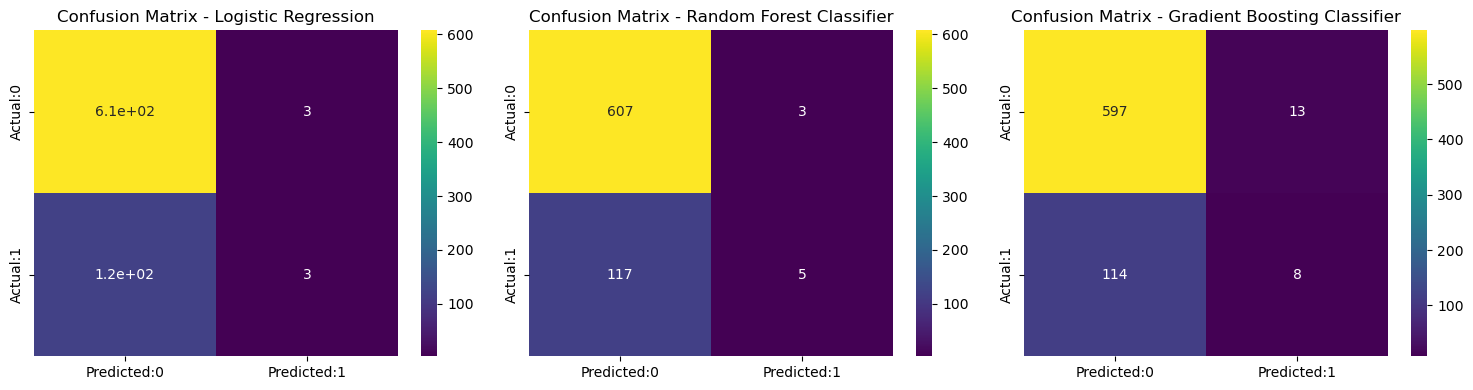

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_true_logistic', 'y_pred_logistic', 'y_true_rf', 'y_pred_rf', 'y_true_gb', 'y_pred_gb' contain true and predicted labels for each model

# Confusion matrix for Logistic Regression
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
conf_matrix_logistic = pd.DataFrame(data=cm_logistic, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Confusion matrix for Random Forest Classifier
cm_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_rf = pd.DataFrame(data=cm_rf, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Confusion matrix for Gradient Boosting Classifier
cm_gb = confusion_matrix(y_test, y_pred_gb)
conf_matrix_gb = pd.DataFrame(data=cm_gb, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Plotting confusion matrices using Seaborn heatmap
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_logistic, annot=True, cmap="viridis")
plt.title('Confusion Matrix - Logistic Regression')

plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap="viridis")
plt.title('Confusion Matrix - Random Forest Classifier')

plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap="viridis")
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.savefig('Confusion_Matrix.png')
plt.tight_layout()
plt.show()


Confusion Matrix - Logistic Regression shows 610+3 = 613 correct predictions and 120+3= 123 incorrect ones.

Confusion Matrix - Random Forest Classifier shows 606+5 =611 correct predictions and 117+4=201 incorrect ones.

Confusion Matrix - Gradient Boosting Classifier shows 601+8 =609 correct predictions and 114+9=123 incorrect ones


Since the model is predicting Heart disease too many type II errors is not advisable. A False Negative ( ignoring the probability of disease when there actualy is one) is more dangerous than a False Positive in this case. Hence inorder to increase the sensitivity, threshold can be lowered.


Predicted probabilities of 0 (No Coronary Heart Disease) and 1 ( Coronary Heart Disease: Yes) for the test data with a default classification threshold of 0.5

In [22]:
# Generate predicted probabilities for Logistic Regression
y_pred_prob_logistic = logistic_model.predict_proba(X_test)
y_pred_prob_df_logistic = pd.DataFrame(data=y_pred_prob_logistic, columns=['Prob of no heart disease (0)', 'Prob of Heart Disease (1)'])
# Display the DataFrame showing the predicted probabilities for Logistic Regression
print("predicted probabilities for Logistic Regression") 
y_pred_prob_df_logistic.head()

predicted probabilities for Logistic Regression


,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.926127,0.073873
1,0.702120,0.297880
2,0.977223,0.022777
3,0.937826,0.062174
4,0.947579,0.052421


In [23]:
# Generate predicted probabilities for Random Forest Classifier
y_pred_prob_rf = rf_model.predict_proba(X_test)
y_pred_prob_df_rf = pd.DataFrame(data=y_pred_prob_rf, columns=['Prob of no heart disease (0)', 'Prob of Heart Disease (1)'])
# Display the DataFrame showing the predicted probabilities for Random Forest Classifier
print("predicted probabilities for Random Forest Classifier")
y_pred_prob_df_rf.head()

predicted probabilities for Random Forest Classifier


,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.98,0.02
1,0.84,0.16
2,0.96,0.04
3,0.98,0.02
4,1.00,0.00


In [24]:
# Generate predicted probabilities for Gradient Boosting Classifier
y_pred_prob_gb = gb_model.predict_proba(X_test)
y_pred_prob_df_gb = pd.DataFrame(data=y_pred_prob_gb, columns=['Prob of no heart disease (0)', 'Prob of Heart Disease (1)'])
# Display the DataFrame showing the predicted probabilities for Gradient Boosting Classifier
print("predicted probabilities for Gradient Boosting Classifier")
y_pred_prob_df_gb.head()

predicted probabilities for Gradient Boosting Classifier


,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.934088,0.065912
1,0.884418,0.115582
2,0.976049,0.023951
3,0.971830,0.028170
4,0.960444,0.039556


But for probabilistic classifiers, which give a probability or score that reflects the degree to which an instance belongs to one class rather than another, we can create a curve by varying the threshold for the score. Note that many discrete classifiers can be converted to a scoring classifier by ‘looking inside’ their instance statistics. For example, a decision tree determines the class of a leaf node from the proportion of instances at the node.

The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [25]:
print("Training Data Columns:", X_train.columns)
print("Test Data Columns:", X_test.columns)


Training Data Columns: Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')
Test Data Columns: Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')


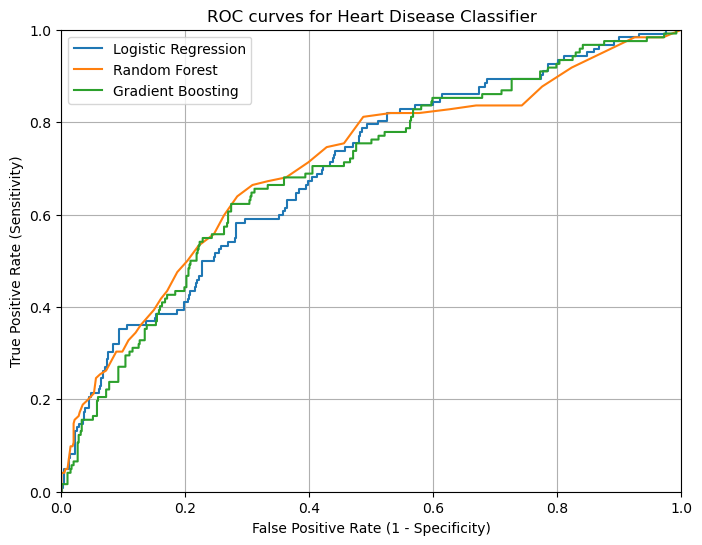

In [26]:
from sklearn.metrics import roc_curve

# For Logistic Regresion lassifier
y_pred_prob_yes_lr = logistic_model.predict_proba(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_yes_lr[:, 1])

#For Random Forest Classifier
y_pred_prob_yes_rf = rf_model.predict_proba(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_yes_rf[:, 1])

# For Gradient Boosting Classifier
y_pred_prob_yes_gb = gb_model.predict_proba(X_test)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_prob_yes_gb[:, 1])

plt.figure(figsize=(8, 6))

plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curves for Heart Disease Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)

# Saving the plot as an image file
plt.savefig('ROC_curves_plot.png')  # Save the figure directly

# Display the plot
plt.show()

Area Under The Curve (AUC)

In [27]:
from sklearn.metrics import roc_auc_score

# For Logistic Regression
AUC_logistic = roc_auc_score(y_test, y_pred_prob_yes_lr[:, 1])
print(f"AUC for Logistic Regression: {AUC_logistic:.4f}")

# For Random Forest Classifier
AUC_rf = roc_auc_score(y_test, y_pred_prob_yes_rf[:, 1])
print(f"AUC for Random Forest Classifier: {AUC_rf:.4f}")

# For Gradient Boosting Classifier
AUC_gb = roc_auc_score(y_test, y_pred_prob_yes_gb[:, 1])

print(f"AUC for Gradient Boosting Classifier: {AUC_gb:.4f}")


AUC for Logistic Regression: 0.6960
AUC for Random Forest Classifier: 0.7050
AUC for Gradient Boosting Classifier: 0.6957


AUC for the three models 
| Classifier                        | AUC     |
|-----------------------------------|---------|
| Logistic Regression               | 0.6989  |
| Random Forest Classifier          | 0.7079  |
| Gradient Boosting Classifier      | 0.7062  |


In [28]:
selected_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
X = clean_data[selected_features]
y = clean_data["TenYearCHD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape


((2649, 8), (2649,), (663, 8), (663,))

In [29]:

# Fit a logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Assuming 'selected_features' contains the selected predictor variables
# Replace this with the actual selected features from your feature selection step
selected_features =['age', 'cigsPerDay', 'totChol', 'sysBP', 
                                        'diaBP', 'BMI', 'heartRate', 'glucose']

# Create a DataFrame with coefficients and corresponding features
coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': logistic_model.coef_[0]  # Get coefficients from the model
})

# Print the coefficients
print(coefficients)



      Feature  Coefficient
0         age     0.071909
1  cigsPerDay     0.033294
2     totChol    -0.000786
3       sysBP     0.021015
4       diaBP    -0.006571
5         BMI     0.021062
6   heartRate     0.001055
7     glucose     0.003299


coefficients of significant predictors in Logistic Regresion model 

| Feature     | Coefficient |
|-------------|-------------|
| age         | 0.071909    |
| cigsPerDay  | 0.033294    |
| totChol     | -0.000786   |
| sysBP       | 0.021015    |
| diaBP       | -0.006571   |
| BMI         | 0.021062    |
| heartRate   | 0.001055    |
| glucose     | 0.003299    |
